In [69]:
import numpy as np
import pandas as pd
import geopandas as gp

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
%matplotlib inline

In [44]:
gdf = gp.read_file('./500Cities_Tracts_11082016/500Cities_Tracts_Clip.shp')
gdf.tract2010 = gdf.tract2010.apply(lambda x: int(x))
gdf['area'] = gdf.area * 3.86102e-7  #converting from meter sq to mile sq
gdf.loc[:, 'density'] = gdf.loc[:,'PlcTrPop10']/gdf.loc[:, 'area']
gdf.head()

,place2010,tract2010,ST,PlaceName,plctract10,PlcTrPop10,area,density,geometry
0,0107000,1073000100,01,Birmingham,0107000-01073000100,3042,4.256874,714.608933,"POLYGON ((-9653001.0557 3974630.898599997, -96..."
1,0107000,1073000300,01,Birmingham,0107000-01073000300,2735,1.166402,2344.817278,"POLYGON ((-9657462.8532 3968794.9956, -9657470..."
2,0107000,1073000400,01,Birmingham,0107000-01073000400,3338,4.461068,748.251386,POLYGON ((-9657275.612600001 3972217.160099998...
3,0107000,1073000500,01,Birmingham,0107000-01073000500,2864,2.685617,1066.421554,POLYGON ((-9660666.406500001 3968887.964100003...
4,0107000,1073000700,01,Birmingham,0107000-01073000700,2577,1.962313,1313.246101,"POLYGON ((-9661391.0966 3968591.4287, -9661398..."


In [45]:
gdf.shape

(29305, 9)

In [46]:
social_explorer = pd.read_csv('./SOCIAL_EXPLORER_CTs.csv',encoding="ISO-8859-1")
social_explorer['TJs'] = social_explorer.loc[:,'TJs'].map({'TJ': 1, '#REF!': 0})
social_explorer.reset_index(inplace=True, drop=True)
social_explorer.head()

,FIPS,Name of Area,State/U.S.-Abbreviation (USPS),Geographic Identifier,TJs,Total Population,% Total Population: Male,% Total Population: Female,% Total Population: Under 5 Years,% Total Population: 5 to 9 Years,...,% Renter-Occupied Housing Units: 10 to 29 Percent,% Renter-Occupied Housing Units: 30 to 49 Percent,% Renter-Occupied Housing Units: 50 Percent or More,% Renter-Occupied Housing Units: Not Computed,% Civilian Population 18 Years and Over: Veteran,% Civilian Population 18 Years and Over: Veteran: 18 to 64 Years,% Civilian Population 18 Years and Over: Veteran: 65 Years and Over,% Civilian Population 18 Years and Over: Nonveteran,% Civilian Population 18 Years and Over: Nonveteran: 18 to 64 Years,% Civilian Population 18 Years and Over: Nonveteran: 65 Years and Over
0,1001020100,"Census Tract 201, Autauga County, Alabama",al,14000US01001020100,0,2010,49.50,50.50,4.53,5.97,...,19.47,25.79,16.84,26.84,10.49,7.21,3.28,89.51,81.72,7.79
1,1001020200,"Census Tract 202, Autauga County, Alabama",al,14000US01001020200,0,2196,53.19,46.81,2.41,7.38,...,39.74,15.71,32.69,11.86,11.41,6.87,4.54,88.59,77.30,11.29
2,1001020300,"Census Tract 203, Autauga County, Alabama",al,14000US01001020300,0,3136,46.30,53.70,1.69,11.96,...,42.15,24.24,32.23,1.38,13.17,9.51,3.66,86.83,67.85,18.98
3,1001020400,"Census Tract 204, Autauga County, Alabama",al,14000US01001020400,0,4563,47.97,52.03,3.77,6.38,...,51.79,24.70,16.67,6.85,14.09,7.10,6.99,85.91,63.16,22.75
4,1001020500,"Census Tract 205, Autauga County, Alabama",al,14000US01001020500,0,10529,47.55,52.45,5.46,7.83,...,36.32,27.91,32.69,1.74,15.76,10.67,5.10,84.24,72.21,12.02


In [47]:
social_explorer.shape

(74001, 60)

### Merging the dataframes to obtain urban census tracts

In [48]:
urban_cts = pd.merge(social_explorer, gdf, left_on='FIPS', right_on='tract2010', how='inner')
urban_cts.head()

,FIPS,Name of Area,State/U.S.-Abbreviation (USPS),Geographic Identifier,TJs,Total Population,% Total Population: Male,% Total Population: Female,% Total Population: Under 5 Years,% Total Population: 5 to 9 Years,...,% Civilian Population 18 Years and Over: Nonveteran: 65 Years and Over,place2010,tract2010,ST,PlaceName,plctract10,PlcTrPop10,area,density,geometry
0,1073000100,"Census Tract 1, Jefferson County, Alabama",al,14000US01073000100,0,3111,53.42,46.58,6.30,9.93,...,11.70,0107000,1073000100,01,Birmingham,0107000-01073000100,3042,4.256874,714.608933,"POLYGON ((-9653001.0557 3974630.898599997, -96..."
1,1073000300,"Census Tract 3, Jefferson County, Alabama",al,14000US01073000300,0,2333,51.99,48.01,6.43,7.46,...,8.28,0107000,1073000300,01,Birmingham,0107000-01073000300,2735,1.166402,2344.817278,"POLYGON ((-9657462.8532 3968794.9956, -9657470..."
2,1073000400,"Census Tract 4, Jefferson County, Alabama",al,14000US01073000400,0,3540,48.90,51.10,8.36,8.62,...,12.17,0107000,1073000400,01,Birmingham,0107000-01073000400,3338,4.461068,748.251386,POLYGON ((-9657275.612600001 3972217.160099998...
3,1073000500,"Census Tract 5, Jefferson County, Alabama",al,14000US01073000500,0,2966,51.08,48.92,11.19,9.58,...,13.80,0107000,1073000500,01,Birmingham,0107000-01073000500,2864,2.685617,1066.421554,POLYGON ((-9660666.406500001 3968887.964100003...
4,1073000700,"Census Tract 7, Jefferson County, Alabama",al,14000US01073000700,0,2724,49.34,50.66,13.25,13.36,...,11.26,0107000,1073000700,01,Birmingham,0107000-01073000700,2577,1.962313,1313.246101,"POLYGON ((-9661391.0966 3968591.4287, -9661398..."


In [49]:
urban_cts.shape

(29304, 69)

In [55]:
for idx, col in enumerate(urban_cts.columns):
    print(idx, col)

0 FIPS
1 Name of Area
2 State/U.S.-Abbreviation (USPS)
3 Geographic Identifier
4 TJs
5 Total Population
6 % Total Population: Male
7 % Total Population: Female
8 % Total Population: Under 5 Years
9 % Total Population: 5 to 9 Years
10 % Total Population: 10 to 14 Years
11 % Total Population: 15 to 17 Years
12 % Total Population: 18 to 24 Years
13 % Total Population: 25 to 34 Years
14 % Total Population: 35 to 44 Years
15 % Total Population: 45 to 54 Years
16 % Total Population: 55 to 64 Years
17 % Total Population: 65 to 74 Years
18 % Total Population: 75 to 84 Years
19 % Total Population: 85 Years and Over
20 Median Age:
21 Median Age: Male Population
22 Median Age: Female Population
23 Total Population:
24 % Total Population: White Alone
25 % Total Population: Black or African American Alone
26 % Total Population: American Indian and Alaska Native Alone
27 % Total Population: Asian Alone
28 % Total Population: Native Hawaiian and Other Pacific Islander Alone
29 % Total Population: Som

### The feature space contains 68 variables
* A high dimensional space will contain features that are correlated.
* The feature space is provided in percentages. Working with ratios will reduce the inferential and predective power of the analysis.

In [56]:
#Age
# tj_ca.iloc[:, 8:20].sum(axis = 1).mean()

#Race
# tj_ca.iloc[:, 24:31].sum(axis = 1).mean()

#Education
# tj_ca.iloc[:, 41:48].sum(axis=1).mean()

#Households: Married-Couple Family, Other Family, Nonfamily Households
# tj_ca.iloc[:, 33] + tj_ca.iloc[:, 34] + tj_ca.iloc[:,37]

#Households: Family Households + Nonfamily Households
# tj_ca.iloc[:, 32] + tj_ca.iloc[:, 37]

#Renter Occupied Household
# tj_ca.iloc[:,49:54].sum(axis=1).mean()

#Civilian Population (Veteran, Nonveteran)
# tj_ca.iloc[:,54] + tj_ca.iloc[:,57]

#Civilian Population 18 Years and Over:  65 Years and Over + 65 Years and Over
# tj_ca.iloc[:,56] + tj_ca.iloc[:,59]

We have demonstrated features that are correlated. Sum of their values is 100.

### Lets reduce the feature space.

* Creating 3 segments for age: Minors, working_adults, retired
* Creating 4 segments for race: White, Black, Asian Alone, Others. Note: Hispanic not provided.
* Creating 5 segments for education: Less than HS/HS, Some College, Bachelors, Master's/Professional, Phd
* Using % Renter-Occupied Units without modification
* Using Median age: Male and Female
* Using Family and Non-Family Households count 
* Not Using Civilian/Veteran Population

In [57]:
#Creating the segments
urban_cts.loc[:,'percent_pop_under_18'] = urban_cts.loc[:,['% Total Population: Under 5 Years', 
                       '% Total Population: 5 to 9 Years', 
                       '% Total Population: 10 to 14 Years', 
                       '% Total Population: 15 to 17 Years']].sum(axis = 1)

urban_cts.loc[:,'percent_pop_working'] = urban_cts.loc[:,['% Total Population: 18 to 24 Years',
                                        '% Total Population: 25 to 34 Years',
                                        '% Total Population: 35 to 44 Years',
                                        '% Total Population: 45 to 54 Years',
                                        '% Total Population: 55 to 64 Years']].sum(axis = 1)

urban_cts.loc[:,'percent_retire'] = urban_cts.loc[:,['% Total Population: 65 to 74 Years',
            '% Total Population: 75 to 84 Years',
            '% Total Population: 85 Years and Over']].sum(axis = 1)

urban_cts.loc[:, 'other_race'] = urban_cts.loc[:, ['% Total Population: American Indian and Alaska Native Alone',
            '% Total Population: Native Hawaiian and Other Pacific Islander Alone',
            '% Total Population: Some Other Race Alone',
            '% Total Population: Two or More Races']].sum(axis = 1)

urban_cts.loc[:, 'HS_or_less'] = urban_cts.loc[:,['% Population 25 Years and Over: Less than High School',
                        '% Population 25 Years and Over: High School Graduate (Includes Equivalency)']].sum(axis = 1)


urban_cts.loc[:, 'Masters_Professional'] =  urban_cts.loc[:, ['% Population 25 Years and Over: Master\'s Degree' ,
              '% Population 25 Years and Over: Professional School Degree']].sum(axis = 1)
        


In [58]:
#Age
urban_cts.loc[:, 'pop_under_18'] = urban_cts.loc[:, 'Total Population'] * \
                                urban_cts.loc[:, 'percent_pop_under_18'] * 0.01
    
urban_cts.loc[:, 'pop_working'] = urban_cts.loc[:, 'Total Population'] * \
                                urban_cts.loc[:, 'percent_pop_working'] * 0.01
    
urban_cts.loc[:, 'pop_retire'] = urban_cts.loc[:, 'Total Population'] * \
                                urban_cts.loc[:, 'percent_retire'] * 0.01

In [59]:
#Gender
urban_cts.loc[:, 'pop_male'] = urban_cts.loc[:,'Total Population'] \
        * urban_cts.loc[:, '% Total Population: Male'] * 0.01
urban_cts.loc[:, 'pop_female'] =  urban_cts.loc[:,'Total Population'] \
        * urban_cts.loc[:,'% Total Population: Female'] * 0.01


In [60]:
#Race
urban_cts.loc[:, 'pop_white'] = urban_cts.loc[:, '% Total Population: White Alone'] * \
                urban_cts.loc[:, 'Total Population:'] * 0.01

urban_cts.loc[:, 'pop_black'] = urban_cts.loc[:, '% Total Population: Black or African American Alone'] * \
                urban_cts.loc[:, 'Total Population:'] * 0.01

urban_cts.loc[:, 'pop_asian'] = urban_cts.loc[:, '% Total Population: Asian Alone'] * \
                urban_cts.loc[:, 'Total Population:'] * 0.01

urban_cts.loc[:, 'pop_other_race'] = urban_cts.loc[:, 'other_race'] * \
                        urban_cts.loc[:, 'Total Population:'] * 0.01



In [61]:
#Education
urban_cts.loc[:, 'pop_hs_or_less'] = urban_cts.loc[:, 'HS_or_less'] * \
                        urban_cts.loc[:, 'Population 25 Years and Over:'] * 0.01
urban_cts.loc[:, 'pop_ms_mba'] = urban_cts.loc[:, 'Masters_Professional'] * \
                        urban_cts.loc[:, 'Population 25 Years and Over:'] * 0.01
urban_cts.loc[:, 'pop_some_college'] = urban_cts.loc[:, '% Population 25 Years and Over: Some College'] * \
                        urban_cts.loc[:, 'Population 25 Years and Over:'] * 0.01
urban_cts.loc[:, 'pop_bs'] = urban_cts.loc[:, '% Population 25 Years and Over: Bachelor\'s Degree'] * \
                        urban_cts.loc[:, 'Population 25 Years and Over:'] * 0.01
urban_cts.loc[:, 'pop_phd'] = urban_cts.loc[:, '% Population 25 Years and Over: Doctorate Degree'] * \
                        urban_cts.loc[:, 'Population 25 Years and Over:'] * 0.01


In [62]:
#Households
urban_cts.loc[:, 'family_household'] = urban_cts.loc[:, '% Households: Family Households']  \
                        * urban_cts.loc[:, 'Households:'] 

urban_cts.loc[:, 'nonfamily_household'] =  urban_cts.loc[:, '% Households: Nonfamily Households']\
                            * urban_cts.loc[:, 'Households:']

In [63]:
census_ca = urban_cts.loc[:, ['TJs', 'Total Population', 'pop_female', 'pop_under_18',
    'pop_working', 'pop_retire','pop_white', 'pop_black', 'pop_asian', 'pop_other_race',
    'pop_hs_or_less', 'pop_some_college', 'pop_bs', 'pop_ms_mba', 'pop_phd',
    'family_household', 'nonfamily_household',
    'Average Household Income (In 2016 Inflation Adjusted Dollars)', 'density']]
census_ca.dropna(inplace=True)
census_ca.reset_index(inplace=True, drop=True)

### The data is imbalanced. I am balancing the data by down-sampling the majority class

In [65]:
from sklearn.utils import resample

df_majority = census_ca[census_ca.TJs == 0]
df_minority = census_ca[census_ca.TJs == 1]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results

census_ca_downsampled = pd.concat([df_majority_downsampled, df_minority])
census_ca_downsampled.TJs.value_counts()

1    262
0    262
Name: TJs, dtype: int64

### Preprocessing the data

In [66]:
from sklearn import preprocessing

# Get column names first
names = census_ca_downsampled.iloc[:,1:].columns

# Create the Scaler object
scaled_census_ca = preprocessing.normalize(census_ca_downsampled.iloc[:,1:], axis=0)
scaled_census_ca = pd.DataFrame(scaled_census_ca, columns=names)
scaled_census_ca.head()

,Total Population,pop_female,pop_under_18,pop_working,pop_retire,pop_white,pop_black,pop_asian,pop_other_race,pop_hs_or_less,pop_some_college,pop_bs,pop_ms_mba,pop_phd,family_household,nonfamily_household,Average Household Income (In 2016 Inflation Adjusted Dollars),density
0,0.007077,0.008054,0.010354,0.005474,0.007303,0.000356,0.032068,0.000000,0.008390,0.008118,0.007143,0.003049,0.003909,0.000000,0.007779,0.005483,0.021336,0.000805
1,0.012775,0.012807,0.010718,0.012027,0.017083,0.000689,0.066620,0.000000,0.003869,0.023669,0.016237,0.002088,0.000929,0.000000,0.011451,0.019285,0.012189,0.005404
2,0.035569,0.034170,0.040756,0.036289,0.015298,0.046563,0.004919,0.000000,0.017392,0.048646,0.036002,0.013520,0.012600,0.000000,0.039096,0.008226,0.030876,0.017680
3,0.049795,0.047241,0.051142,0.049867,0.036221,0.045965,0.024129,0.030553,0.051726,0.047345,0.037019,0.040237,0.040680,0.083234,0.044376,0.036673,0.032827,0.159949
4,0.031369,0.030997,0.030303,0.030361,0.031058,0.032442,0.017210,0.014792,0.019515,0.037870,0.030366,0.018210,0.024317,0.018972,0.030683,0.019143,0.041837,0.035796


### Peforming feature selection using recursive feature elimination

https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['Total Population', 'pop_female', 'pop_under_18',
    'pop_working', 'pop_retire','pop_white', 'pop_black', 'pop_asian', 'pop_other_race',
    'pop_hs_or_less', 'pop_some_college', 'pop_bs', 'pop_ms_mba', 'pop_phd',
    'family_household', 'nonfamily_household',
    'Average Household Income (In 2016 Inflation Adjusted Dollars)']

X = scaled_census_ca[cols]
y = census_ca_downsampled.TJs

# Build a logreg and compute the feature importances
model = LogisticRegression()

# create the RFE model and select 12 attributes
rfe = RFE(model, 12)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['pop_working', 'pop_retire', 'pop_white', 'pop_black', 'pop_asian', 'pop_hs_or_less', 'pop_some_college', 'pop_bs', 'pop_ms_mba', 'pop_phd', 'nonfamily_household', 'Average Household Income (In 2016 Inflation Adjusted Dollars)']


Optimal number of features: 9
Selected features: ['pop_retire', 'pop_black', 'pop_asian', 'pop_hs_or_less', 'pop_bs', 'pop_ms_mba', 'pop_phd', 'nonfamily_household', 'Average Household Income (In 2016 Inflation Adjusted Dollars)']


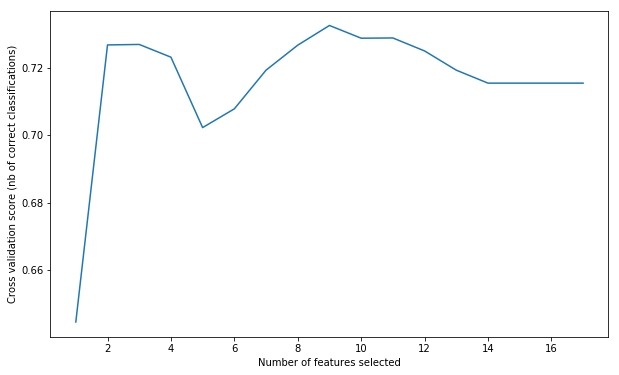

In [71]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [77]:
Selected_features = ['pop_retire', 'pop_black', 'pop_asian', 'pop_hs_or_less', 
                     'pop_bs', 'pop_ms_mba', 'pop_phd', 'nonfamily_household',
                     'Average Household Income (In 2016 Inflation Adjusted Dollars)']

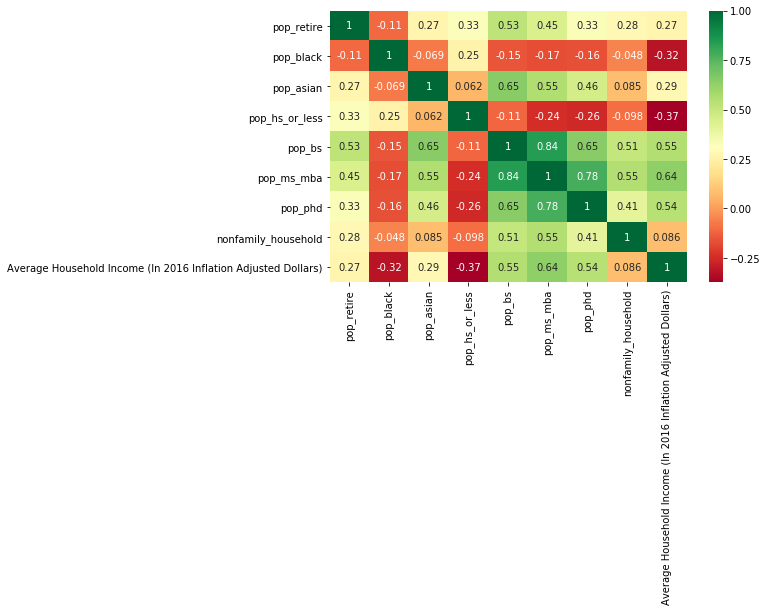

In [78]:
import seaborn as sns
X = scaled_census_ca[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Heatmap does not provide any substantial inference.

### Model Evaluation using test-train split

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# # create X (features) and y (response)
# X = scaled_census_ca[Selected_features]
# y = scaled_census_ca['TJs']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.790
LogisticRegression log_loss is 0.638
LogisticRegression auc is 0.849


## Accuracy is higher than only california study but as we are working on a predicitive classification problem, we need to consider the sensitivity and specificity too.

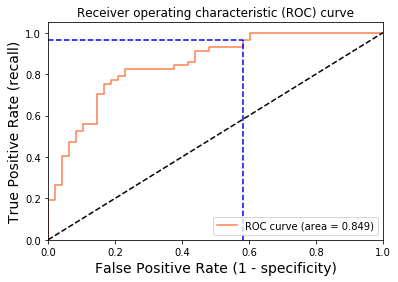

Using a threshold of 0.458 guarantees a sensitivity of 0.965 and a specificity of 0.417, i.e. a false positive rate of 58.33%.


In [82]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### The false postive rate is more than 50% which means that we need to improve our model.

An alternative argument can be made that the locations classifed as possible tj locations but identified as negative in our predictive model are viable location not being used as TJ's location due to additional constraints.

Maybe an enriched feature space  such as transportation patterns in the census tracts, land use patterns or other qualitative factors might provide more insights and reduce the false postive rate. 

### 4.2.2. Model evaluation based on K-fold cross-validation using cross_val_score() function¶


* Use cross_val_score function
* We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
* cv=10 for 10 folds
* scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many

In [83]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.734 (+/-0.046)
LogisticRegression average log_loss: 0.641 (+/-0.009)
LogisticRegression average auc: 0.806 (+/-0.044)


### GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously¶
We can applied many tasks together for more in-depth evaluation like gridsearch using cross-validation based on k-folds repeated many times, that can be scaled or no with respect to many scorers and tunning on parameter for a given estimator!

Stratification is the process of rearranging the data as to ensure each fold is a good representative of the whole. For example in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.

best params: Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=False, with_std=False)), ('clf', LogisticRegression(C=0.20001000000000002, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
best params: {'clf__C': 0.20001000000000002}
best score: 0.7400763358778626


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


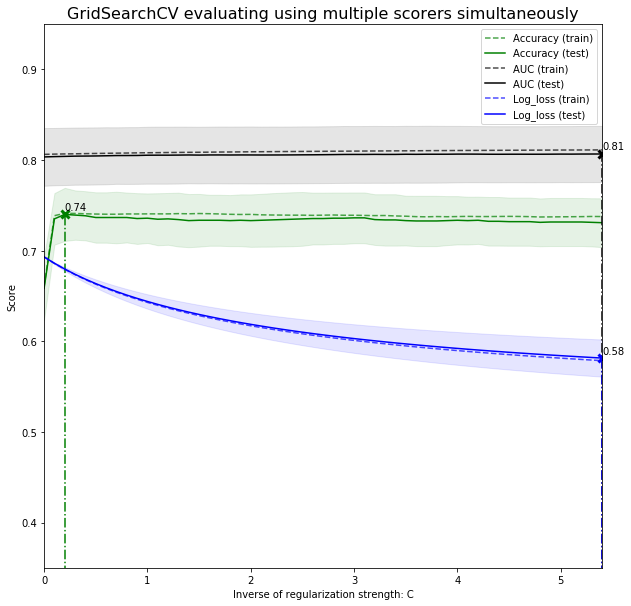

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

### Confusion matrix

In [85]:
#https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

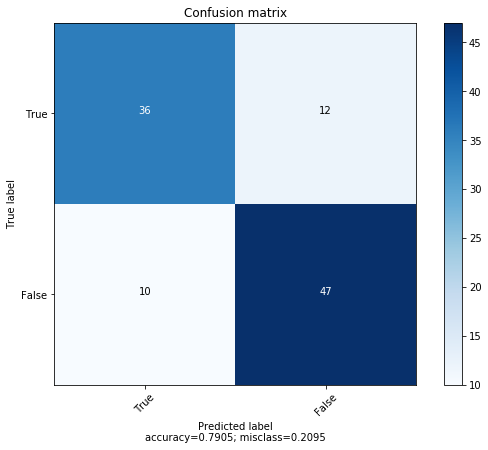

In [86]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm=confusion_matrix(y_test, log_clf.predict(X_test)), 
                      target_names=['True', 'False'], cmap=plt.cm.Blues, normalize=False)

### 20.95% of the labels are misclassified using the given features. We need to enrich our feature space to improve the classification accuracy while ensuring precision and recall are balanced.

Another argument can be to change the scale of our analysis to census tract to another geographical unit which might provide more insight for our model.

Training the model on some other class of classifcation algorithms such as decision tress might also be beneficial.